In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

In [4]:
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [5]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df=pd.read_csv('/content/drive/MyDrive/DS Data Sets/Text Mining/Elon_musk.csv',encoding='Latin-1')

In [13]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [17]:
df.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [18]:
df.columns

Index(['Text'], dtype='object')

In [66]:
df.shape

(1999, 1)

In [21]:
tweets=df.copy()
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [22]:
tweets=[Text.strip() for Text in tweets.Text]
tweets=[Text for Text in tweets if Text]
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [23]:
tweets_text=''.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [27]:
from nltk.tokenize import TweetTokenizer

In [29]:
# Check if tweets is a string
if not isinstance(tweets,str):
  tweets=str(tweets)

In [30]:
tknzr=TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
tweets_tokens=tknzr.tokenize(tweets)

In [32]:
tweets_tokens_text=''.join(tweets_tokens)
tweets_tokens_text

'[\'i\\x92manalien\',\'raytracingoncyberpunkwithhdrisnext-level.haveyoutriedit?\',\'greatinterview!\',\'dogeisunderestimated\',\'congratulationsteslachinaforamazingexecutionlastyear.nowontothenextforevenmore!!\',\'happynewyearoftheox!https://t.co/9WFKMYu2oj\',\'frodowastheunderdoge,\\nallthoughthewouldfail,\\nhimselfmostofall.https://t.co/zGxJFDzzrM\',\'hahathanks:)\',\'indeed!tweetsdefinitelydonotrepresentreal-worldtimeallocation.\',\'themostentertainingoutcomeisthemostlikely\',\'justsentsome\',\'justagreetodoclubhousewith\',\'https://t.co/3rWE9uHSTS\',\'it\\x92sgettingreal\',\'boughtsomedogecoinforlilx,sohecanbeatoddlerhodler\',\'hedefinitelyhasissues,butthesentencingseemsabithigh\',\'thanksforfixing\',\'pleaseunlockmyaccount\',\'<u+0001f923><u+0001f923>\',\'thisistruepowerhahahttps://t.co/Fc9uhQSd7O\',\'anycryptowalletthatwon\\x92tgiveyouyourprivatekeysshouldbeavoidedatallcosts\',\'yourappsucks\',\'rt:nasahasselectedfalconheavytolaunchthefirsttwoelementsofthelunargatewaytogetheronon

In [67]:
import string
import warnings
warnings.filterwarnings('ignore')
import re

In [68]:
def cleantext(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)
  text=re.sub(r'#','',text)
  text=re.sub(r'RT[\s]+','',text)
  text=re.sub(r'https?:\/\/\S+','',text)

  return text

df['Text']=df['Text'].apply(cleantext)
df.head()

,Text
0,Im an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [69]:
df.tail()

,Text
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...
1998,Progress update August 28


In [70]:
!pip install nltk
import nltk

In [71]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(text)
text_tokens


['[',
 "'",
 '@',
 'kunalb11',
 'I\\x92m',
 'an',
 'alien',
 "'",
 ',',
 "'",
 '@',
 'ID_AA_Carmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'next-level',
 '.',
 'Have',
 'you',
 'tried',
 'it',
 '?',
 "'",
 ',',
 "'",
 '@',
 'joerogan',
 '@',
 'Spotify',
 'Great',
 'interview',
 '!',
 "'",
 ',',
 "'",
 '@',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 "'",
 ',',
 "'",
 '@',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 '.',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '!',
 '!',
 "'",
 ',',
 "'Happy",
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 '!',
 'https',
 ':',
 '//t.co/9WFKMYu2oj',
 "'",
 ',',
 "'Frodo",
 'was',
 'the',
 'underdoge',
 ',',
 '\\nAll',
 'thought',
 'he',
 'would',
 'fail',
 ',',
 '\\nHimself',
 'most',
 'of',
 'all',
 '.',
 'https',
 ':',
 '//t.co/zGxJFDzzrM',
 "'",
 ',',
 "'",
 '@',
 'OwenSparks_',
 '@',
 'flcnhvy',
 '@',
 'anonyx10',
 'Haha',
 'thanks',
 ':',

In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
len(text_tokens)

34454

In [75]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['\x92','rt','ye','yeah','haha','Yes','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['[', "'", '@', 'kunalb11', 'I\\x92m', 'alien', "'", ',', "'", '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', "'", ',', "'", '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', "'", ',', "'", '@', 'gtera27', 'Doge', 'underestimated', "'", ',', "'", '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!', '!', "'", ',', "'Happy", 'New', 'Year', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', "'", ',', "'Frodo", 'underdoge', ',', '\\nAll', 'thought', 'would', 'fail', ',', '\\nHimself', '.', 'https', ':', '//t.co/zGxJFDzzrM', "'", ',', "'", '@', 'OwenSparks_', '@', 'flcnhvy', '@', 'anonyx10', 'Haha', 'thanks', ':', ')', "'", ',', "'", '@', 'flcnhvy', '@', 'anonyx10', 'Indeed', '!', 'Tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation', '.', "'", ',', "'The", 'entertaining', 'outcome', 'likely', "'", ',', "'", '@', 'GiveDirectly', 'Just', 'sent'

In [76]:
lower_words=[Text.lower() for Text in no_stop_tokens]
lower_words

['[',
 "'",
 '@',
 'kunalb11',
 'i\\x92m',
 'alien',
 "'",
 ',',
 "'",
 '@',
 'id_aa_carmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'next-level',
 '.',
 'have',
 'tried',
 '?',
 "'",
 ',',
 "'",
 '@',
 'joerogan',
 '@',
 'spotify',
 'great',
 'interview',
 '!',
 "'",
 ',',
 "'",
 '@',
 'gtera27',
 'doge',
 'underestimated',
 "'",
 ',',
 "'",
 '@',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 '.',
 'now',
 'next',
 'even',
 '!',
 '!',
 "'",
 ',',
 "'happy",
 'new',
 'year',
 'ox',
 '!',
 'https',
 ':',
 '//t.co/9wfkmyu2oj',
 "'",
 ',',
 "'frodo",
 'underdoge',
 ',',
 '\\nall',
 'thought',
 'would',
 'fail',
 ',',
 '\\nhimself',
 '.',
 'https',
 ':',
 '//t.co/zgxjfdzzrm',
 "'",
 ',',
 "'",
 '@',
 'owensparks_',
 '@',
 'flcnhvy',
 '@',
 'anonyx10',
 'haha',
 'thanks',
 ':',
 ')',
 "'",
 ',',
 "'",
 '@',
 'flcnhvy',
 '@',
 'anonyx10',
 'indeed',
 '!',
 'tweets',
 'definitely',
 'represent',
 'real-world',
 'time',
 'allocation',
 '.

In [78]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
stemmed_tokens

['[',
 "'",
 '@',
 'kunalb11',
 'i\\x92m',
 'alien',
 "'",
 ',',
 "'",
 '@',
 'id_aa_carmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'next-level',
 '.',
 'have',
 'tri',
 '?',
 "'",
 ',',
 "'",
 '@',
 'joerogan',
 '@',
 'spotifi',
 'great',
 'interview',
 '!',
 "'",
 ',',
 "'",
 '@',
 'gtera27',
 'doge',
 'underestim',
 "'",
 ',',
 "'",
 '@',
 'teslacn',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 '.',
 'now',
 'next',
 'even',
 '!',
 '!',
 "'",
 ',',
 "'happi",
 'new',
 'year',
 'ox',
 '!',
 'http',
 ':',
 '//t.co/9wfkmyu2oj',
 "'",
 ',',
 "'frodo",
 'underdog',
 ',',
 '\\nall',
 'thought',
 'would',
 'fail',
 ',',
 '\\nhimself',
 '.',
 'http',
 ':',
 '//t.co/zgxjfdzzrm',
 "'",
 ',',
 "'",
 '@',
 'owensparks_',
 '@',
 'flcnhvi',
 '@',
 'anonyx10',
 'haha',
 'thank',
 ':',
 ')',
 "'",
 ',',
 "'",
 '@',
 'flcnhvi',
 '@',
 'anonyx10',
 'inde',
 '!',
 'tweet',
 'definit',
 'repres',
 'real-world',
 'time',
 'alloc',
 '.',
 "'",
 ',',
 "'the",
 'entertain',


In [61]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
doc=nlp(''.join(lower_words))
doc

In [ ]:
lemmas= [token.lemma_ for token in doc]
lemmas

In [81]:
clean_tweets=''.join(lemmas)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [83]:
print(cv.vocabulary_)

{'kunalb11i': 2124, 'x92malien': 4648, 'id_aa_carmackraytracingcyberpunkhdrnext': 1830, 'level': 2191, 'havetried': 1706, 'joerogan': 2007, 'spotifygreatinterview': 3569, 'gtera27dogeunderestimated': 1663, 'teslacncongratulationsteslachinaamazingexecutionlastyear': 3757, 'nownexteven': 2699, 'happynewyearox': 1690, 'https': 1790, 'co': 885, '9wfkmyu2oj': 323, 'frodounderdoge': 1520, 'nallthoughtwouldfail': 2523, 'nhimself': 2642, 'zgxjfdzzrm': 5073, 'owensparks_': 2813, 'flcnhvy': 1441, 'anonyx10hahathanks': 470, 'anonyx10indeed': 471, 'tweetsdefinitelyrepresentreal': 4212, 'worldtimeallocation': 4586, 'theentertainingoutcomelikely': 3984, 'givedirectlyjustsent': 1607, 'justagreeclubhouse': 2037, 'kanyewest': 2065, '3rwe9uhsts': 217, 'geoffkeighley': 1573, 'unrealengineit': 4278, 'x92sgettingreal': 4770, 'boughtdogecoinlilx': 709, 'toddlerhodler': 4151, 'joshmanmodehedefinitelyissues': 2022, 'sentencingseemsbithigh': 3285, 'freewalletorgthanksfixing': 1516, 'freewalletorgpleaseunlockac

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
feature_names=cv.get_feature_names_out()
feature_names

array(['000', '0001f1e6', '0001f1e7', ..., 'zynsxisp4n', 'zzcool',
       'ððogecoin'], dtype=object)

In [90]:
print(tweetscv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 2 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [91]:
tweetscv.toarray().shape

(5, 5094)

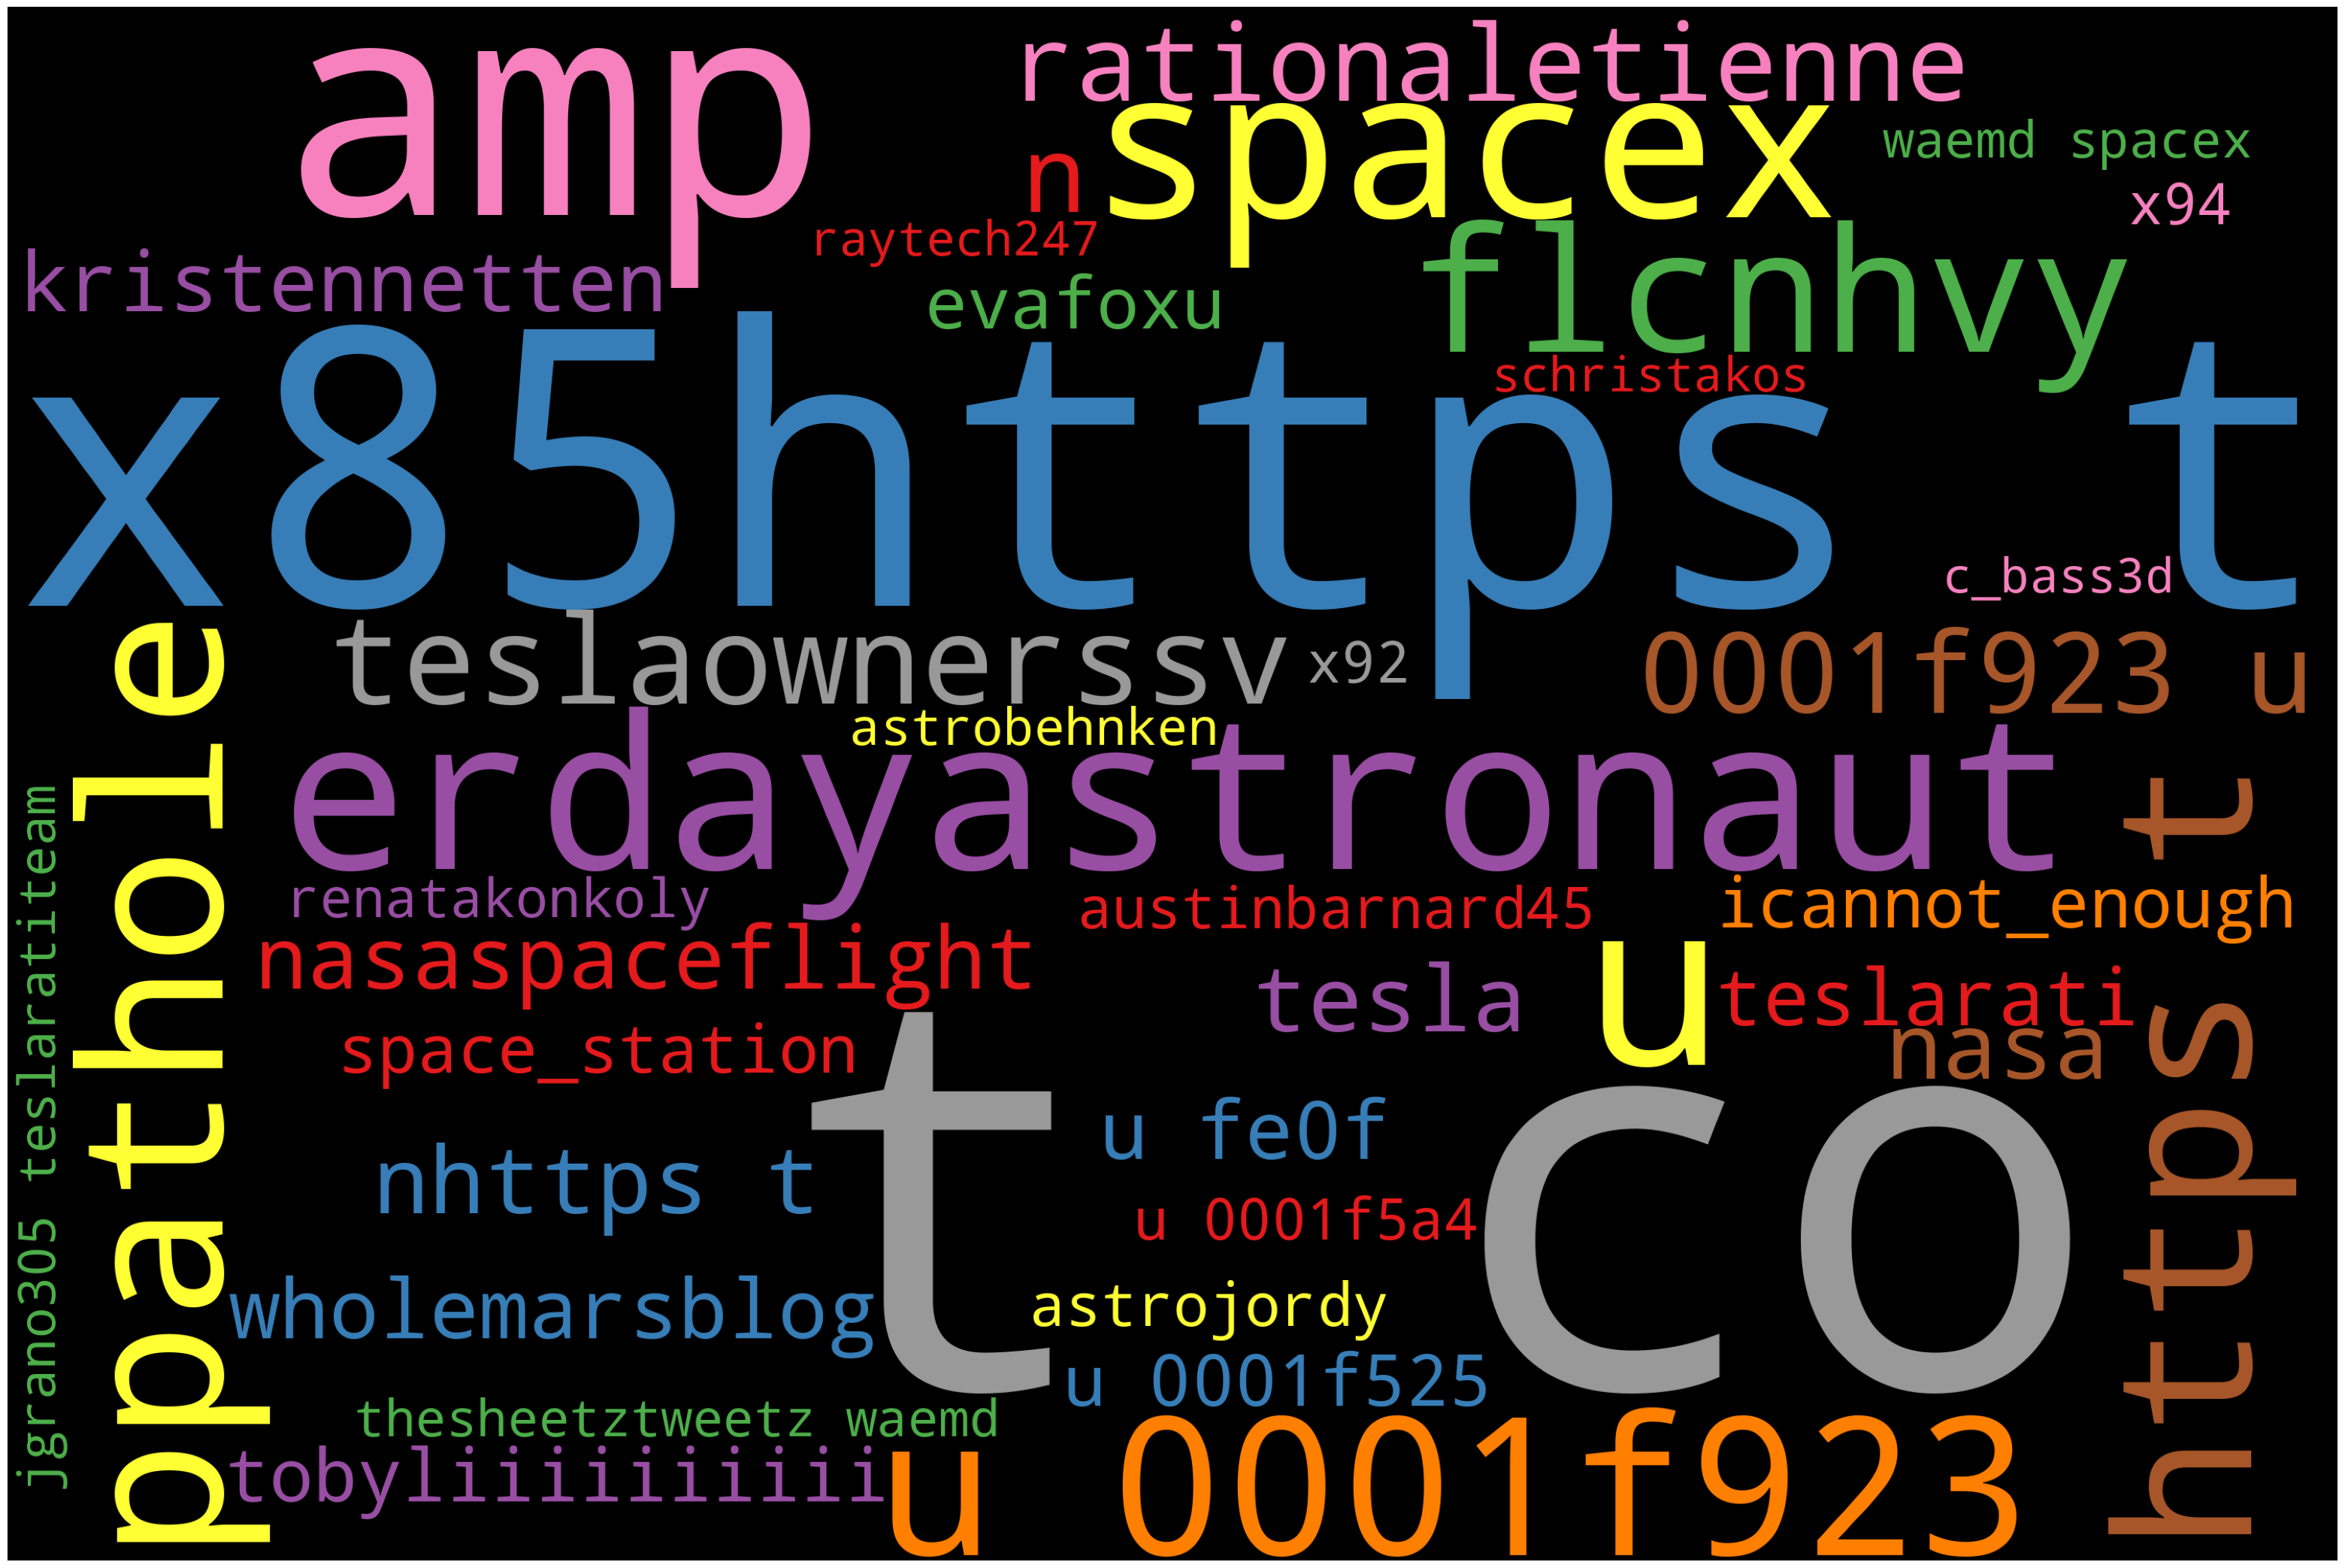

In [92]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=40,
                    colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)

plot_cloud(wordcloud)